In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
plt.show()

In [2]:
survey = pd.read_csv('surveyfinal.csv')

In [3]:
survey.head()

,study_method,code,learn_method,mooc,mooc_help,preptime,cgpa,avg_attendance,social_media,movies,nervous,events,breakstudy,friends time,clubs_involve,clubnum
0,1,V,1,1,0,1,4,3,3,1,1,4,2,1,1,2
1,5,S,7,0,0,1,2,2,5,5,1,7,0,5,1,3
2,25,CVS,4,1,1,3,4,3,3,3,1,4,3,5,1,2
3,1,V,1,1,0,2,2,2,1,2,1,7,1,1,1,1
4,28,VS,4,1,1,3,3,3,1,1,1,2,1,2,1,1


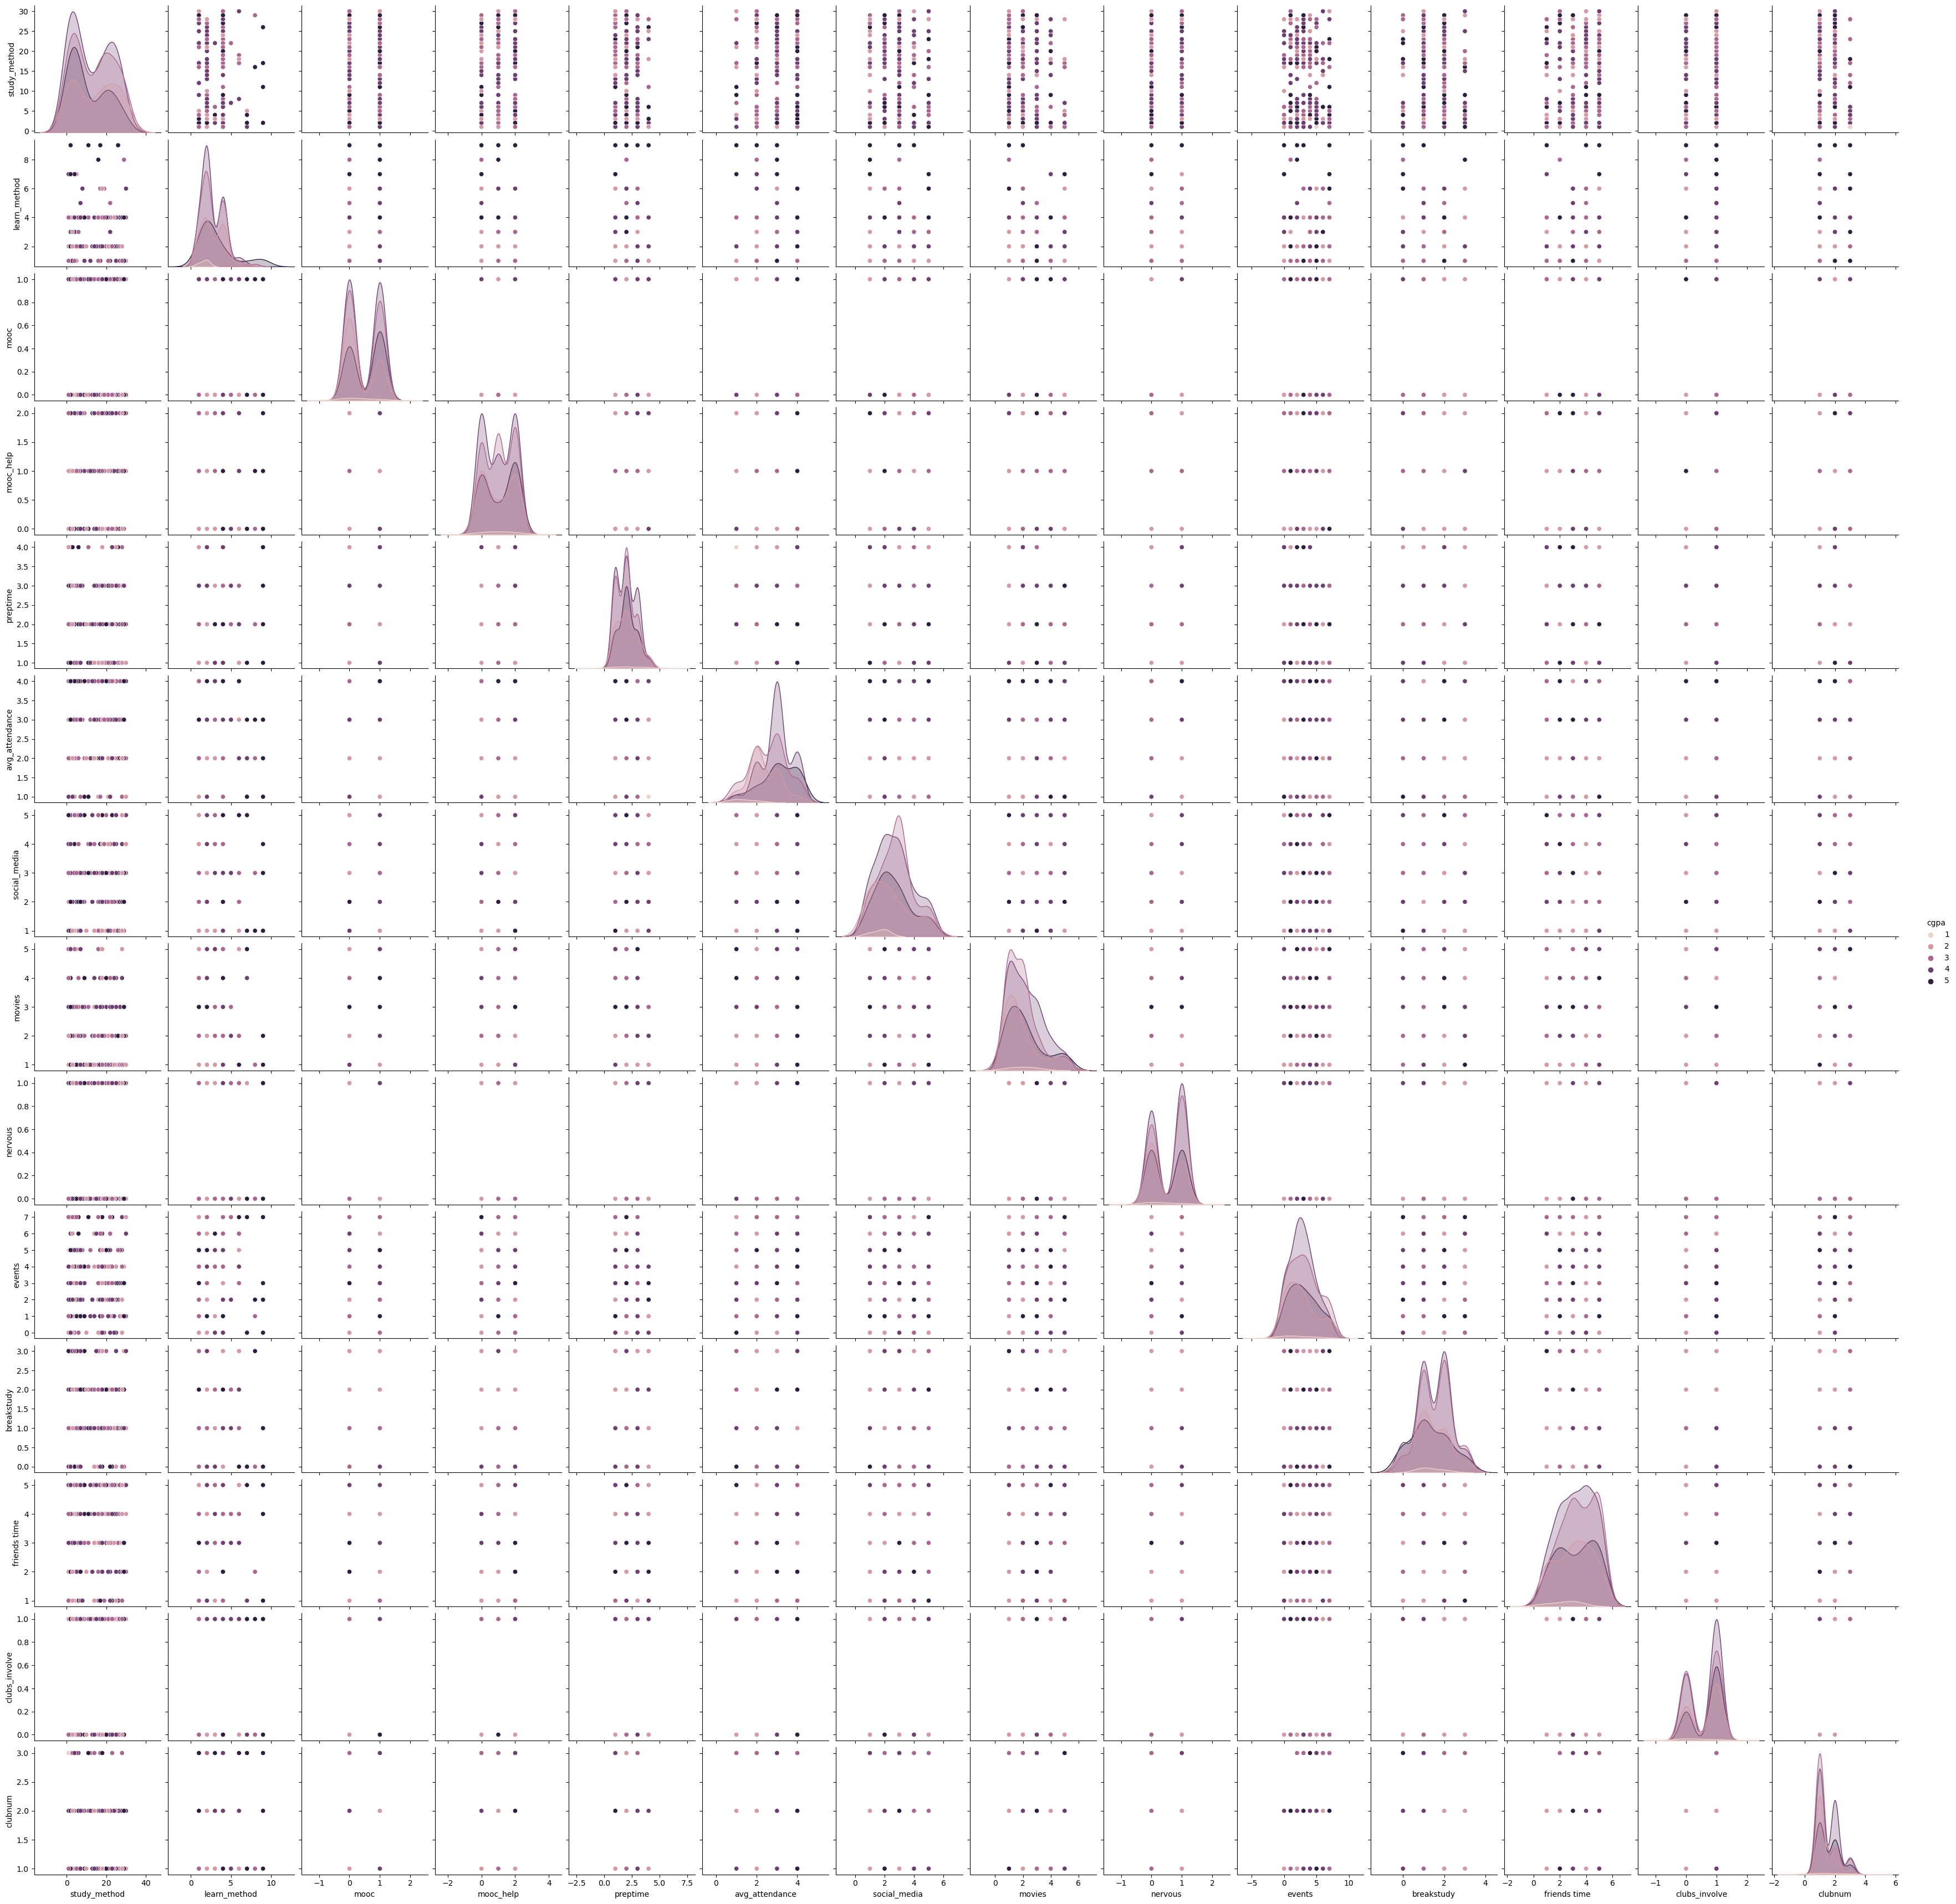

In [4]:
sns.pairplot(survey, diag_kind = 'kde', hue='cgpa')

In [5]:
survey=survey.drop('code', axis=1)

In [6]:
survey.head()

,study_method,learn_method,mooc,mooc_help,preptime,cgpa,avg_attendance,social_media,movies,nervous,events,breakstudy,friends time,clubs_involve,clubnum
0,1,1,1,0,1,4,3,3,1,1,4,2,1,1,2
1,5,7,0,0,1,2,2,5,5,1,7,0,5,1,3
2,25,4,1,1,3,4,3,3,3,1,4,3,5,1,2
3,1,1,1,0,2,2,2,1,2,1,7,1,1,1,1
4,28,4,1,1,3,3,3,1,1,1,2,1,2,1,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=survey.drop('cgpa',axis=1)
y = survey['cgpa']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,rfc_pred))

[[ 0  0  0  0  1]
 [ 0  0 10  5  0]
 [ 0  3 12 11  1]
 [ 0  2  5 13  1]
 [ 0  0  5 10  1]]


In [28]:
warnings.filterwarnings('ignore')

In [29]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        15
           3       0.38      0.44      0.41        27
           4       0.33      0.62      0.43        21
           5       0.25      0.06      0.10        16

    accuracy                           0.33        80
   macro avg       0.19      0.23      0.19        80
weighted avg       0.26      0.33      0.27        80



In [30]:
#DEcision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.12      0.13      0.12        15
           3       0.37      0.37      0.37        27
           4       0.33      0.33      0.33        21
           5       0.21      0.19      0.20        16

    accuracy                           0.28        80
   macro avg       0.21      0.20      0.21        80
weighted avg       0.28      0.28      0.28        80



In [37]:
print(confusion_matrix(y_test,predictions))

[[ 0  0  1  0  0]
 [ 1  2  4  5  3]
 [ 0  8 10  4  5]
 [ 0  5  6  7  3]
 [ 0  2  6  5  3]]


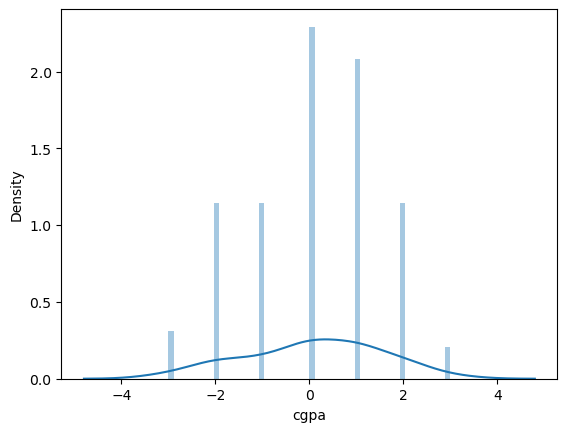

In [38]:
sns.distplot((y_test-predictions),bins=50);